Fetching the data

In [3]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.dataLoader import loadSession
from src.features import *


In [4]:
#loading the session data for MONZA 2024

fp1 = loadSession(2024, 'Monza', 'FP1')
fp2 = loadSession(2024, 'Monza', 'FP2')
fp3 = loadSession(2024, 'Monza', 'FP3')
quali = loadSession(2024, 'Monza', 'Q')
race = loadSession(2024, 'Monza', 'R')

core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '12', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using ca

In [5]:
df = getBestLaps(fp1)
df = df.merge(getAvg_top3Laps(fp2), on="Driver", how="outer")
df = df.merge(getAvg_top3Laps(fp3), on="Driver", how="outer")
df = df.merge(getQualiResults(quali), on="Driver", how="outer")
df = df.merge(getRacePositions(race), on="Driver", how="outer")
df.sort_values('Race_result', inplace=True)


In [6]:
df.sort_values('Race_result', inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
df.head(10)

,Driver,Practice 1_BestLap,Practice 2_Top3Average,Practice 3_Top3Average,Quali_Position,Race_result
0,LEC,0 days 00:01:21.904000,0 days 00:01:21.317666666,0 days 00:01:20.390333333,4.0,1
1,MAG,0 days 00:01:22.572000,0 days 00:01:22.349666666,0 days 00:01:21.412000,13.0,10
2,ALO,0 days 00:01:22.315000,0 days 00:01:22.036666666,0 days 00:01:21.143333333,11.0,11
3,COL,0 days 00:01:22.880000,0 days 00:01:22.049333333,0 days 00:01:21.484666666,18.0,12
4,RIC,0 days 00:01:22.605000,0 days 00:01:21.996000,0 days 00:01:21.586666666,12.0,13
5,OCO,0 days 00:01:22.880000,0 days 00:01:22.075000,0 days 00:01:21.441333333,15.0,14
6,GAS,0 days 00:01:22.763000,0 days 00:01:22.259666666,0 days 00:01:21.396333333,14.0,15
7,BOT,0 days 00:01:22.127000,0 days 00:01:22.175333333,0 days 00:01:21.816000,19.0,16
8,HUL,0 days 00:01:23.157000,0 days 00:01:22.088000,0 days 00:01:21.064000,10.0,17
9,ZHO,0 days 00:01:22.854000,0 days 00:01:22.761333333,0 days 00:01:22.588666666,20.0,18


In [8]:
from src.preProcessing import processFeatures

df_clean = processFeatures(df)
df_clean.head(10)

,Driver,Practice 1_BestLap,Practice 2_Top3Average,Practice 3_Top3Average,Quali_Position,Race_result
0,LEC,0 days 00:01:21.904000,81.317667,80.390333,4.0,1
1,MAG,0 days 00:01:22.572000,82.349667,81.412000,13.0,10
2,ALO,0 days 00:01:22.315000,82.036667,81.143333,11.0,11
3,COL,0 days 00:01:22.880000,82.049333,81.484667,18.0,12
4,RIC,0 days 00:01:22.605000,81.996000,81.586667,12.0,13
5,OCO,0 days 00:01:22.880000,82.075000,81.441333,15.0,14
6,GAS,0 days 00:01:22.763000,82.259667,81.396333,14.0,15
7,BOT,0 days 00:01:22.127000,82.175333,81.816000,19.0,16
8,HUL,0 days 00:01:23.157000,82.088000,81.064000,10.0,17
9,ZHO,0 days 00:01:22.854000,82.761333,82.588667,20.0,18


In [9]:
df["Practice 1_BestLap"] = pd.to_timedelta(df["Practice 1_BestLap"], errors="coerce")
df["Practice 1_BestLap"] = df["Practice 1_BestLap"].dt.total_seconds()

df_clean = df[df["Race_result"].apply(lambda x: str(x).isdigit())].copy()
df_clean["Race_result"] = df_clean["Race_result"].astype(int)

In [10]:
df.head(10)

,Driver,Practice 1_BestLap,Practice 2_Top3Average,Practice 3_Top3Average,Quali_Position,Race_result
0,LEC,81.904,81.317667,80.390333,4.0,1
1,MAG,82.572,82.349667,81.412000,13.0,10
2,ALO,82.315,82.036667,81.143333,11.0,11
3,COL,82.880,82.049333,81.484667,18.0,12
4,RIC,82.605,81.996000,81.586667,12.0,13
5,OCO,82.880,82.075000,81.441333,15.0,14
6,GAS,82.763,82.259667,81.396333,14.0,15
7,BOT,82.127,82.175333,81.816000,19.0,16
8,HUL,83.157,82.088000,81.064000,10.0,17
9,ZHO,82.854,82.761333,82.588667,20.0,18


Preparing the features and target

In [11]:
from sklearn.model_selection import train_test_split

df_clean1 = df_clean.copy()
X = df_clean1.drop(columns=["Driver", "Race_result"])
y = df_clean1["Race_result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

using xg-boost for model training

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")


MAE: 3.04


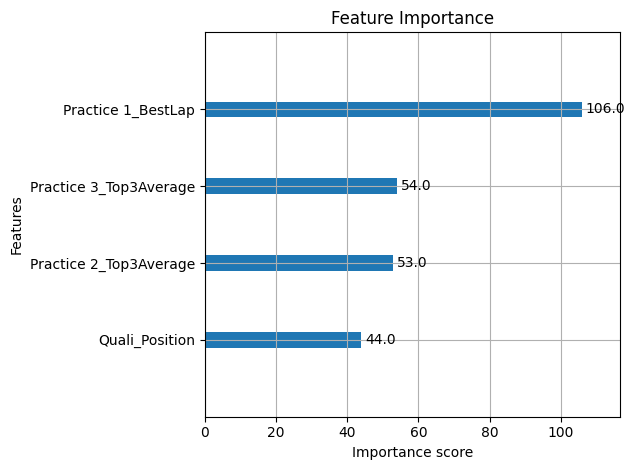

In [13]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [14]:
df_dynamics = pd.read_csv("../data/processed/monza_2024_full_features.csv")

In [15]:
df_dynamics.head()

,maxSpeed,avgCornerSpeed,avgThrottle,avgBrake,Driver
0,347.0,110.656250,80.408497,0.114379,NOR
1,346.0,112.472222,79.922559,0.117845,PIA
2,348.0,111.906250,83.085987,0.117834,RUS
3,351.0,109.818182,82.624204,0.136943,LEC
4,351.0,110.714286,80.786624,0.146497,SAI


In [16]:
for col in df_dynamics.columns:
    print(col)


maxSpeed
avgCornerSpeed
avgThrottle
avgBrake
Driver


In [18]:
for col in df_clean.columns:
    print(col)

Driver
Practice 1_BestLap
Practice 2_Top3Average
Practice 3_Top3Average
Quali_Position
Race_result


In [20]:
df_combined = pd.merge(
    df_clean,
    df_dynamics,
    on="Driver",
    how="inner"  
)
for col in df_combined.columns:
    print(col)

Driver
Practice 1_BestLap
Practice 2_Top3Average
Practice 3_Top3Average
Quali_Position
Race_result
maxSpeed
avgCornerSpeed
avgThrottle
avgBrake


getting more data for more context

In [21]:
from fastf1.ergast import Ergast

ergast = Ergast()
season_data = ergast.get_driver_standings(season=2024).content[0]
print ("Season data: \n")
for col in season_data.columns:
    print(col)

Season data: 

position
positionText
points
wins
driverId
driverNumber
driverCode
driverUrl
givenName
familyName
dateOfBirth
driverNationality
constructorIds
constructorUrls
constructorNames
constructorNationalities


In [22]:
print ("Team Data : \n")
team_data = ergast.get_constructor_standings(season=2024).content[0]
for col in team_data.columns:
    print(col)

Team Data : 

position
positionText
points
wins
constructorId
constructorUrl
constructorName
constructorNationality


In [23]:
driver_standings = ergast.get_driver_standings(season=2024)
season_data = driver_standings.content[0]  
df_driver_context = season_data.rename(columns={
    'driverCode': 'Driver',
    'points': 'DriverPoints',
    'wins': 'DriverWins',
    'constructorNames': 'Constructor'
})[['Driver', 'DriverPoints', 'DriverWins', 'Constructor']]

df_driver_context['Constructor'] = df_driver_context['Constructor'].apply(lambda x: x[0])
df_driver_context.head()

,Driver,DriverPoints,DriverWins,Constructor
0,VER,437.0,9,Red Bull
1,NOR,374.0,4,McLaren
2,LEC,356.0,3,Ferrari
3,PIA,292.0,2,McLaren
4,SAI,290.0,2,Ferrari


In [24]:
for col in df_combined.columns:
    for col2 in df_driver_context.columns:
        if col == col2:
            print(f"Column {col} exists in both dataframes.")

Column Driver exists in both dataframes.


In [25]:
df_final = df_combined.merge(df_driver_context, on='Driver', how='left')
df_final.head()


,Driver,Practice 1_BestLap,Practice 2_Top3Average,Practice 3_Top3Average,Quali_Position,Race_result,maxSpeed,avgCornerSpeed,avgThrottle,avgBrake,DriverPoints,DriverWins,Constructor
0,LEC,81.904,81.317667,80.390333,4.0,1,351.0,109.818182,82.624204,0.136943,356.0,3,Ferrari
1,MAG,82.572,82.349667,81.412000,13.0,10,351.0,109.606061,80.883117,0.129870,16.0,0,Haas F1 Team
2,ALO,82.315,82.036667,81.143333,11.0,11,354.0,107.181818,77.938983,0.142373,70.0,0,Aston Martin
3,COL,82.880,82.049333,81.484667,18.0,12,348.0,109.694444,77.547945,0.150685,5.0,0,Williams
4,RIC,82.605,81.996000,81.586667,12.0,13,353.0,110.400000,81.126667,0.106667,12.0,0,RB F1 Team


In [26]:
for col in df_final.columns:
    print(col)

Driver
Practice 1_BestLap
Practice 2_Top3Average
Practice 3_Top3Average
Quali_Position
Race_result
maxSpeed
avgCornerSpeed
avgThrottle
avgBrake
DriverPoints
DriverWins
Constructor


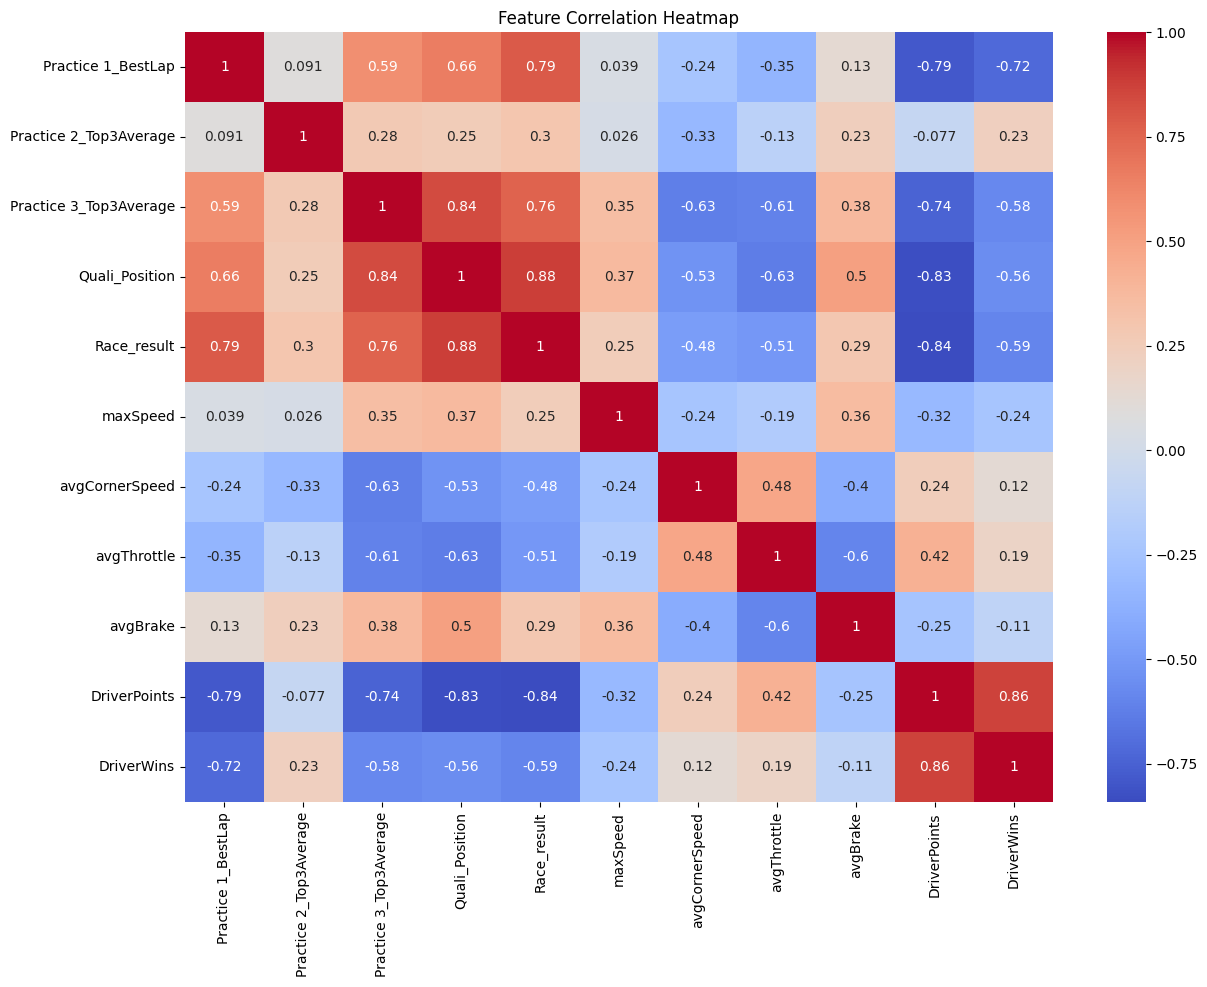

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df_final.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
df_corr = df_final.select_dtypes(include='number') 
correlations = df_corr.corr()['Race_result'].sort_values(ascending=False)
print("Correlation of each feature with Race_result:\n")
print(correlations)

Correlation of each feature with Race_result:

Race_result               1.000000
Quali_Position            0.880567
Practice 1_BestLap        0.787970
Practice 3_Top3Average    0.755844
Practice 2_Top3Average    0.299587
avgBrake                  0.289718
maxSpeed                  0.249963
avgCornerSpeed           -0.481048
avgThrottle              -0.506663
DriverWins               -0.590540
DriverPoints             -0.842078
Name: Race_result, dtype: float64


In [29]:
df_final.to_csv("../data/processed/monza_2024_full_features.csv", index=False)

In [30]:
df_final1 = df_final.copy()

MAE: 3.23


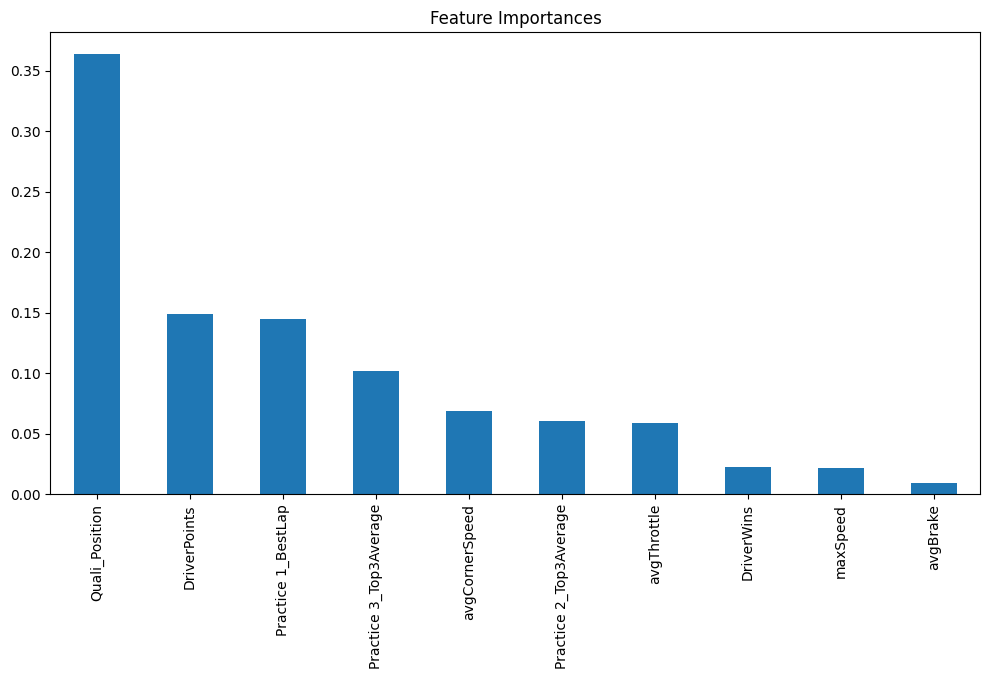

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

features = df_final.drop(columns=[
    'Driver', 'Constructor', 'Race_result'
])
target = df_final['Race_result']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"MAE: {mae:.2f}")

importances = pd.Series(model.feature_importances_, index=features.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title="Feature Importances")
plt.show()


Dropping the columns due to negative corelation

avgCornerSpeed

avgThrottleSpeed

DriverWins

DriverPoints

In [34]:
low_corr_features = ['DriverWins', 'DriverPoints', 'avgCornerSpeed', 'avgThrottle']
df = df_final.copy()
df_filtered = df.drop(columns=low_corr_features)

In [35]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

params = {
    "n_estimators": [100, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}
model = XGBRegressor(random_state=42)
grid = GridSearchCV(model, param_grid=params, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best MAE:", -grid.best_score_)

Best MAE: 3.3366634845733643


In [37]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 4, 5, 6, 7, 8],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "reg_lambda": [0.5, 1, 1.5]
}
model = XGBRegressor(random_state=42)
rand_search = RandomizedSearchCV(
    model,
    param_distributions=params,
    n_iter=50,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1,
    n_jobs=1
)

rand_search.fit(X_train, y_train)
best_model = rand_search.best_estimator_
print("Best MAE:", -rand_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best MAE: 2.5132319688797


lets add car pace data

In [47]:
import fastf1
from fastf1 import get_event_schedule
import pandas as pd
from datetime import datetime

fastf1.Cache.enable_cache('../data/raw')
schedule = get_event_schedule(2024)
schedule = schedule[schedule['EventFormat'] != 'Testing']  

past_rounds = schedule[schedule.index < 16]
print(f"Rounds before Monza GP (16):")
display(past_rounds[['RoundNumber', 'EventName', 'Country', 'Location']])


Rounds before Monza GP (16):


,RoundNumber,EventName,Country,Location
0,0,Pre-Season Testing,Bahrain,Sakhir
1,1,Bahrain Grand Prix,Bahrain,Sakhir
2,2,Saudi Arabian Grand Prix,Saudi Arabia,Jeddah
3,3,Australian Grand Prix,Australia,Melbourne
4,4,Japanese Grand Prix,Japan,Suzuka
5,5,Chinese Grand Prix,China,Shanghai
6,6,Miami Grand Prix,United States,Miami
7,7,Emilia Romagna Grand Prix,Italy,Imola
8,8,Monaco Grand Prix,Monaco,Monaco
9,9,Canadian Grand Prix,Canada,Montréal


In [48]:
from collections import defaultdict
fastf1.Cache.enable_cache('../data/raw')

schedule = get_event_schedule(2024)
schedule = schedule[schedule['EventFormat'] != 'Testing']

monza_round = 16
past_rounds = schedule[schedule.index < monza_round]
qualifying_positions = defaultdict(list)
race_deltas = defaultdict(list)

for rnd in past_rounds.index:
    try:
        event = fastf1.get_event(2024, rnd)
        print(f"Processing {event['EventName']} ({rnd})...")
        session_quali = event.get_session('Q') 
        session_quali.load()
        for drv in session_quali.results.itertuples():
            driver_code = drv.Abbreviation
            if drv.Position > 0:
                qualifying_positions[driver_code].append(drv.Position)

        # RACE
        session_race = event.get_session('R')
        session_race.load()
        
        laps = session_race.laps.pick_quicklaps()
        if laps.empty:
            continue
        
        fastest_lap = laps.pick_fastest()
        fastest_time = fastest_lap['LapTime'].total_seconds()

        for drv in laps['Driver'].unique():
            drv_laps = laps.pick_driver(drv)
            if drv_laps.empty:
                continue
            best_lap = drv_laps.pick_fastest()
            delta = best_lap['LapTime'].total_seconds() - fastest_time
            race_deltas[drv].append(delta)

    except Exception as e:
        print(f"Skipping round {rnd} due to error: {e}")
        continue


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Skipping round 0 due to error: Cannot get testing event by round number!
Processing Bahrain Grand Prix (1)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '11', '14', '4', '81', '44', '27', '22', '18', '23', '3', '20', '77', '24', '2', '31', '10']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count

Processing Saudi Arabian Grand Prix (2)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '14', '81', '4', '63', '44', '22', '18', '38', '23', '20', '3', '27', '77', '31', '10', '2', '24']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap

Processing Australian Grand Prix (3)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
r

Processing Japanese Grand Prix (4)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '55', '14', '81', '44', '16', '63', '22', '3', '27', '77', '23', '31', '18', '10', '20', '2', '24']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_coun

Processing Chinese Grand Prix (5)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '4', '81', '16', '55', '63', '27', '77', '18', '3', '31', '23', '10', '24', '20', '44', '22', '2']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count

Processing Miami Grand Prix (6)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '4', '81', '63', '44', '27', '22', '18', '10', '31', '23', '14', '77', '2', '3', '20', '24']
core           INFO 	Loading data for Miami Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
r

Processing Emilia Romagna Grand Prix (7)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '55', '63', '22', '44', '3', '27', '11', '31', '18', '23', '10', '77', '24', '20', '14', '2']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for la

Processing Monaco Grand Prix (8)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '3', '18', '27', '14', '2', '20', '11', '77', '24']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count


Processing Canadian Grand Prix (9)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '4', '81', '3', '14', '44', '22', '18', '23', '16', '55', '2', '20', '10', '11', '77', '31', '27', '24']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_coun

Processing Spanish Grand Prix (10)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '16', '55', '10', '11', '31', '81', '14', '77', '27', '18', '24', '20', '22', '3', '23', '2']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count

Processing Austrian Grand Prix (11)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '55', '44', '16', '81', '11', '27', '31', '3', '20', '10', '22', '14', '23', '18', '77', '2', '24']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_coun

Processing British Grand Prix (12)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '18'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '4', '1', '81', '27', '55', '18', '23', '14', '16', '2', '22', '24', '3', '77', '20', '31', '11', '10']
core           INFO 	Loading data for British Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data 

Processing Hungarian Grand Prix (13)...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '55', '44', '16', '14', '18', '3', '22', '27', '77', '23', '2', '20', '11', '63', '24', '31', '10']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_cou

Processing Belgian Grand Prix (14)...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to

Processing Dutch Grand Prix (15)...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to

In [49]:
qualifying_df = pd.DataFrame([
    {'Driver': drv, 'AvgQualiPosition': sum(pos)/len(pos)}
    for drv, pos in qualifying_positions.items()
])

race_delta_df = pd.DataFrame([
    {'Driver': drv, 'AvgRacePaceDelta': sum(deltas)/len(deltas)}
    for drv, deltas in race_deltas.items()
])

df_contextual = pd.merge(qualifying_df, race_delta_df, on='Driver', how='outer')
df_contextual.sort_values('AvgQualiPosition', inplace=True)
print("\n Final contextual DataFrame:")
display(df_contextual)


 Final contextual DataFrame:


,Driver,AvgQualiPosition,AvgRacePaceDelta
19,VER,1.866667,0.791333
9,NOR,3.466667,0.819533
12,PIA,5.133333,1.098400
7,LEC,5.133333,1.162214
15,SAI,5.642857,1.207429
14,RUS,5.933333,1.140733
5,HAM,7.533333,1.202600
11,PER,8.066667,1.122500
1,ALO,9.400000,1.364000
2,BEA,11.000000,0.554000


In [50]:
df_final = pd.merge(df_final, df_contextual, on='Driver', how='left')

print(df_final.columns)
df_final.head()

Index(['Driver', 'Practice 1_BestLap', 'Practice 2_Top3Average',
       'Practice 3_Top3Average', 'Quali_Position', 'Race_result', 'maxSpeed',
       'avgCornerSpeed', 'avgThrottle', 'avgBrake', 'DriverPoints',
       'DriverWins', 'Constructor', 'AvgQualiPosition', 'AvgRacePaceDelta'],
      dtype='object')


,Driver,Practice 1_BestLap,Practice 2_Top3Average,Practice 3_Top3Average,Quali_Position,Race_result,maxSpeed,avgCornerSpeed,avgThrottle,avgBrake,DriverPoints,DriverWins,Constructor,AvgQualiPosition,AvgRacePaceDelta
0,LEC,81.904,81.317667,80.390333,4.0,1,351.0,109.818182,82.624204,0.136943,356.0,3,Ferrari,5.133333,1.162214
1,MAG,82.572,82.349667,81.412000,13.0,10,351.0,109.606061,80.883117,0.129870,16.0,0,Haas F1 Team,15.600000,2.200571
2,ALO,82.315,82.036667,81.143333,11.0,11,354.0,107.181818,77.938983,0.142373,70.0,0,Aston Martin,9.400000,1.364000
3,COL,82.880,82.049333,81.484667,18.0,12,348.0,109.694444,77.547945,0.150685,5.0,0,Williams,NaN,NaN
4,RIC,82.605,81.996000,81.586667,12.0,13,353.0,110.400000,81.126667,0.106667,12.0,0,RB F1 Team,12.933333,2.323857


In [51]:
correlations = df_final.corr(numeric_only=True)['Race_result'].sort_values(ascending=False)
print("New Correlations with Race_result:\n", correlations)

New Correlations with Race_result:
 Race_result               1.000000
Quali_Position            0.880567
AvgQualiPosition          0.823892
AvgRacePaceDelta          0.802176
Practice 1_BestLap        0.787970
Practice 3_Top3Average    0.755844
Practice 2_Top3Average    0.299587
avgBrake                  0.289718
maxSpeed                  0.249963
avgCornerSpeed           -0.481048
avgThrottle              -0.506663
DriverWins               -0.590540
DriverPoints             -0.842078
Name: Race_result, dtype: float64


In [54]:
selected_features = [
  'Quali_Position',
  'AvgQualiPosition',
  'AvgRacePaceDelta',
  'Practice 1_BestLap',
  'Practice 3_Top3Average'
]

In [55]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

df_final_copy = df_final.copy()
X = df_final[selected_features]
y = df_final['Race_result']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")


MAE: 2.4157


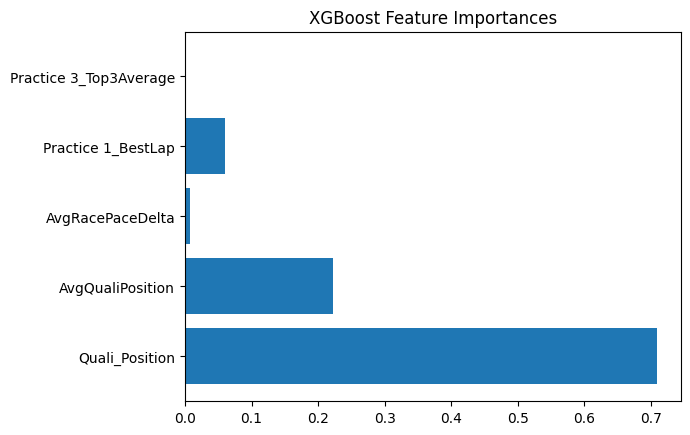

In [56]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title("XGBoost Feature Importances")
plt.show()


In [57]:
!pip install tqdm

In [58]:
from fastf1 import get_session, Cache
from tqdm import tqdm
import pandas as pd
import numpy as np

Cache.enable_cache('../data/raw')

year = 2024
gp = 'Monza'
session_types = ['FP1', 'FP2', 'FP3', 'Q', 'R']

driver_data = {}

for session_type in session_types:
    print(f"\n⏳ Processing {session_type} session...")

    session = get_session(year, gp, session_type)
    session.load(telemetry=True)

    for drv in tqdm(session.drivers):
        try:
            driver_abbr = session.get_driver(drv)['Abbreviation']
            drv_laps = session.laps.pick_driver(drv)
            if drv_laps.empty:
                continue

            fastest_lap = drv_laps.pick_fastest()
            telemetry = fastest_lap.get_telemetry()

            # Mean sector times
            sector1 = drv_laps['Sector1Time'].mean().total_seconds()
            sector2 = drv_laps['Sector2Time'].mean().total_seconds()
            sector3 = drv_laps['Sector3Time'].mean().total_seconds()

            # Speed performance
            high_speed_perf = telemetry[telemetry['Speed'] > 200]['Speed'].mean()
            low_speed_perf = telemetry[telemetry['Speed'] < 100]['Speed'].mean()

            # Brake usage
            avg_brake_pressure = telemetry[telemetry['Brake'] > 0]['Brake'].mean()

            # Throttle aggressiveness
            telemetry['ThrottleDiff'] = telemetry['Throttle'].diff().abs()
            throttle_aggressiveness = telemetry['ThrottleDiff'].mean()

            if driver_abbr not in driver_data:
                driver_data[driver_abbr] = {
                    'Sector1Time_mean': [],
                    'Sector2Time_mean': [],
                    'Sector3Time_mean': [],
                    'HighSpeedCornerPerf': [],
                    'LowSpeedCornerPerf': [],
                    'AvgBrakePressure': [],
                    'ThrottleAggressiveness': []
                }

            # Append values for averaging later
            driver_data[driver_abbr]['Sector1Time_mean'].append(sector1)
            driver_data[driver_abbr]['Sector2Time_mean'].append(sector2)
            driver_data[driver_abbr]['Sector3Time_mean'].append(sector3)
            driver_data[driver_abbr]['HighSpeedCornerPerf'].append(high_speed_perf)
            driver_data[driver_abbr]['LowSpeedCornerPerf'].append(low_speed_perf)
            driver_data[driver_abbr]['AvgBrakePressure'].append(avg_brake_pressure)
            driver_data[driver_abbr]['ThrottleAggressiveness'].append(throttle_aggressiveness)

        except Exception as e:
            print(f"⚠️ Error processing {drv} in {session_type}: {e}")
            continue

# Aggregate all sessions into mean per driver
final_features = []
for driver, feats in driver_data.items():
    final_features.append({
        'Driver': driver,
        'Sector1Time_mean': np.nanmean(feats['Sector1Time_mean']),
        'Sector2Time_mean': np.nanmean(feats['Sector2Time_mean']),
        'Sector3Time_mean': np.nanmean(feats['Sector3Time_mean']),
        'HighSpeedCornerPerf': np.nanmean(feats['HighSpeedCornerPerf']),
        'LowSpeedCornerPerf': np.nanmean(feats['LowSpeedCornerPerf']),
        'AvgBrakePressure': np.nanmean(feats['AvgBrakePressure']),
        'ThrottleAggressiveness': np.nanmean(feats['ThrottleAggressiveness']),
    })

df_driver_features_2025 = pd.DataFrame(final_features)
print(df_driver_features_2025.head())


⏳ Processing FP1 session...


core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '12', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '77', '81']
  0%|          | 0/20 [00:00<?, ?it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: F


⏳ Processing FP2 session...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '63', '77', '81']
  0%|          | 0/20 [00:00<?, ?it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
  5%|▌         | 1/20 [00:00<00:08,  2.21it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
 10%|█         | 2/20 [00


⏳ Processing FP3 session...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '63', '77', '81']
  0%|          | 0/20 [00:00<?, ?it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
  5%|▌         | 1/20 [00:00<00:07,  2.58it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
 10%|█         | 2/20 [00


⏳ Processing Q session...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '55', '44', '1', '11', '23', '27', '14', '3', '20', '10', '31', '22', '18', '43', '77', '24']
  0%|          | 0/20 [00:00<?, ?it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
  5%|▌         | 1/20 [00:00<00:11,  1.62it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
 10%|█         | 2/20 [00


⏳ Processing R session...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
  0%|          | 0/20 [00:00<?, ?it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
  5%|▌         | 1/20 [00:00<00:18,  1.03it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
 10%|█         | 2/20 [00

  Driver  Sector1Time_mean  Sector2Time_mean  Sector3Time_mean  \
0    VER         33.666678         33.926542         33.235325   
1    RIC         34.121589         32.890807         33.090644   
2    NOR         33.240399         33.020917         33.036102   
3    GAS         34.319998         34.719120         34.244366   
4    PER         32.295341         33.460236         33.336353   

   HighSpeedCornerPerf  LowSpeedCornerPerf  AvgBrakePressure  \
0           283.469666           82.348963               1.0   
1           285.457871           80.923685               1.0   
2           286.113198           81.687966               1.0   
3           284.427178           82.327032               1.0   
4           283.600355           81.168689               1.0   

   ThrottleAggressiveness  
0                2.231611  
1                2.086359  
2                2.091413  
3                2.069687  
4                2.193119  


In [59]:
from fastf1 import get_session, Cache
from tqdm import tqdm
import pandas as pd
import numpy as np

Cache.enable_cache('../data/raw')  

year = 2024
gp = 'Monza'
session_types = ['Q', 'R']

all_features = []

for session_type in session_types:
    print(f"\n Processing {session_type} session...")

    session = get_session(year, gp, session_type)
    session.load(telemetry=True)

    for drv in tqdm(session.drivers):
        drv_laps = session.laps.pick_driver(drv)
        if drv_laps.empty:
            continue
        try:
            driver_abbr = session.get_driver(drv)['Abbreviation']
            fastest_lap = drv_laps.pick_fastest()
            telemetry = fastest_lap.get_telemetry()

            sector1 = drv_laps['Sector1Time'].mean().total_seconds() if pd.notnull(drv_laps['Sector1Time'].mean()) else np.nan
            sector2 = drv_laps['Sector2Time'].mean().total_seconds() if pd.notnull(drv_laps['Sector2Time'].mean()) else np.nan
            sector3 = drv_laps['Sector3Time'].mean().total_seconds() if pd.notnull(drv_laps['Sector3Time'].mean()) else np.nan

            high_speed_perf = telemetry[telemetry['Speed'] > 200]['Speed'].mean()
            low_speed_perf = telemetry[telemetry['Speed'] < 100]['Speed'].mean()

            avg_brake_pressure = telemetry[telemetry['Brake'] > 0]['Brake'].mean()
            telemetry['ThrottleDiff'] = telemetry['Throttle'].diff().abs()
            throttle_aggressiveness = telemetry['ThrottleDiff'].mean()

            all_features.append({
                'Session': session_type,
                'Driver': driver_abbr,
                'Sector1Time_mean': sector1,
                'Sector2Time_mean': sector2,
                'Sector3Time_mean': sector3,
                'HighSpeedCornerPerf': high_speed_perf,
                'LowSpeedCornerPerf': low_speed_perf,
                'AvgBrakePressure': avg_brake_pressure,
                'ThrottleAggressiveness': throttle_aggressiveness
            })

        except Exception as e:
            print(f"⚠️ Error processing {drv} in {session_type}: {e}")
            continue

# Create DataFrame
df_2025_features = pd.DataFrame(all_features)

# Optional: Pivot to wide format by session (useful for merging later)
df_wide = df_2025_features.pivot(index='Driver', columns='Session').reset_index()
df_wide.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_wide.columns.values]



core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...



 Processing Q session...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '55', '44', '1', '11', '23', '27', '14', '3', '20', '10', '31', '22', '18', '43', '77', '24']
  0%|          | 0/20 [00:00<?, ?it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
  5%|▌         | 1/20 [00:00<00:07,  2.50it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
 10%|█         | 2/20 [00


 Processing R session...


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
  0%|          | 0/20 [00:00<?, ?it/s]d:\FullStack\F1Predictor\venv\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver 

In [60]:
df_2025_features.head()

,Session,Driver,Sector1Time_mean,Sector2Time_mean,Sector3Time_mean,HighSpeedCornerPerf,LowSpeedCornerPerf,AvgBrakePressure,ThrottleAggressiveness
0,Q,NOR,29.338000,33.662500,32.105909,287.361687,84.115836,1.0,2.063415
1,Q,PIA,31.211384,33.596526,32.212111,288.835612,84.654573,1.0,2.146865
2,Q,RUS,30.622000,33.401777,33.444000,285.810817,83.003821,1.0,2.166314
3,Q,LEC,31.847933,32.370476,32.586850,288.598401,84.949539,1.0,2.041319
4,Q,SAI,32.767538,32.881055,32.516529,288.455282,83.060293,1.0,2.119548


In [62]:
df_final_copy = df_final.copy()

df_final = pd.merge(
    df_final,
    df_driver_features_2025,
    on='Driver',
    how='left'
)

df_final = pd.merge(
    df_final,
    df_wide,
    on='Driver',
    how='left'
)

print("Final shape:", df_final.shape)
print(df_final.columns)
print(df_final.head())

Final shape: (19, 36)
Index(['Driver', 'Practice 1_BestLap', 'Practice 2_Top3Average',
       'Practice 3_Top3Average', 'Quali_Position', 'Race_result', 'maxSpeed',
       'avgCornerSpeed', 'avgThrottle', 'avgBrake', 'DriverPoints',
       'DriverWins', 'Constructor', 'AvgQualiPosition', 'AvgRacePaceDelta',
       'Sector1Time_mean', 'Sector2Time_mean', 'Sector3Time_mean',
       'HighSpeedCornerPerf', 'LowSpeedCornerPerf', 'AvgBrakePressure',
       'ThrottleAggressiveness', 'Sector1Time_mean_Q', 'Sector1Time_mean_R',
       'Sector2Time_mean_Q', 'Sector2Time_mean_R', 'Sector3Time_mean_Q',
       'Sector3Time_mean_R', 'HighSpeedCornerPerf_Q', 'HighSpeedCornerPerf_R',
       'LowSpeedCornerPerf_Q', 'LowSpeedCornerPerf_R', 'AvgBrakePressure_Q',
       'AvgBrakePressure_R', 'ThrottleAggressiveness_Q',
       'ThrottleAggressiveness_R'],
      dtype='object')
  Driver  Practice 1_BestLap  Practice 2_Top3Average  Practice 3_Top3Average  \
0    LEC              81.904               81.31766

In [63]:
correlations = df_final.corr(numeric_only=True)['Race_result'].sort_values(ascending=False)
print("New Correlations with Race_result:\n", correlations)


New Correlations with Race_result:
 Race_result                 1.000000
Sector3Time_mean_R          0.942810
Sector2Time_mean_R          0.932923
Quali_Position              0.880567
AvgQualiPosition            0.823892
AvgRacePaceDelta            0.802176
Practice 1_BestLap          0.787970
Practice 3_Top3Average      0.755844
Sector1Time_mean_R          0.642367
Sector3Time_mean_Q          0.541526
Sector3Time_mean            0.526208
Practice 2_Top3Average      0.299587
avgBrake                    0.289718
maxSpeed                    0.249963
Sector2Time_mean            0.228165
HighSpeedCornerPerf         0.152726
Sector1Time_mean            0.111009
LowSpeedCornerPerf_R        0.060777
ThrottleAggressiveness_Q   -0.075033
LowSpeedCornerPerf         -0.221323
HighSpeedCornerPerf_R      -0.227195
HighSpeedCornerPerf_Q      -0.243117
ThrottleAggressiveness     -0.272829
Sector1Time_mean_Q         -0.401592
LowSpeedCornerPerf_Q       -0.441455
ThrottleAggressiveness_R   -0.446985
av

In [64]:
selected_features = [
    "Sector3Time_mean_R",
    "Sector2Time_mean_R",
    "Quali_Position",
    "AvgQualiPosition",
    "AvgRacePaceDelta",
    "Practice 1_BestLap",
    "Practice 3_Top3Average",
    "Sector1Time_mean_R",
    "Sector3Time_mean_Q",
    "Sector3Time_mean"
]


In [65]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

df_final_copy = df_final.copy()
X = df_final[selected_features]
y = df_final['Race_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

MAE: 2.2271


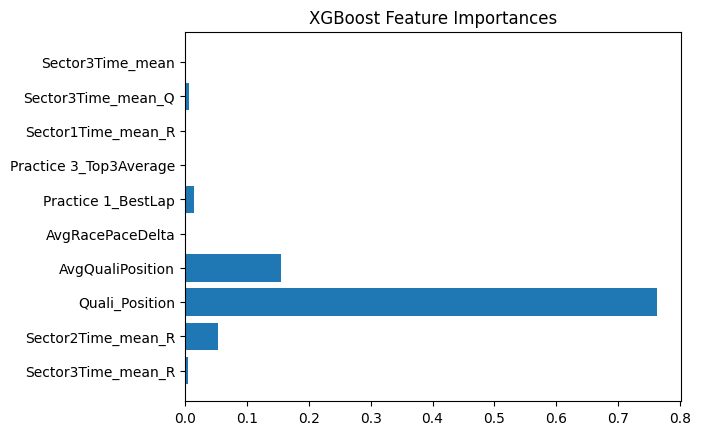

In [66]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title("XGBoost Feature Importances")
plt.show()

In [67]:
print("Feature importances:")
for feature, importance in zip(X.columns, importances): 
    print(f"{feature}: {importance:.4f}")

Feature importances:
Sector3Time_mean_R: 0.0044
Sector2Time_mean_R: 0.0534
Quali_Position: 0.7632
AvgQualiPosition: 0.1556
AvgRacePaceDelta: 0.0000
Practice 1_BestLap: 0.0146
Practice 3_Top3Average: 0.0000
Sector1Time_mean_R: 0.0015
Sector3Time_mean_Q: 0.0073
Sector3Time_mean: 0.0001


In [79]:
params = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 4, 5, 6, 7, 8],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "reg_lambda": [0.5, 1, 1.5]
}
model = XGBRegressor(random_state=42)
rand_search = RandomizedSearchCV(
    model,
    param_distributions=params,
    n_iter=50,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=1,
    n_jobs=1
)

rand_search.fit(X_train, y_train)
best_model = rand_search.best_estimator_
print("Best MAE:", -rand_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best MAE: 1.6181175112724304


In [80]:
import joblib

joblib.dump(best_model, "monza_podium_predictor.pkl")
print("Model saved")

Model saved


In [70]:
!pip uninstall numpy -y
!pip install numpy==2.2.0
!pip install shap

Found existing installation: numpy 2.2.0
Uninstalling numpy-2.2.0:
  Successfully uninstalled numpy-2.2.0


You can safely remove it manually.
You can safely remove it manually.


  Using cached numpy-2.2.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.0-cp313-cp313-win_amd64.whl (12.6 MB)


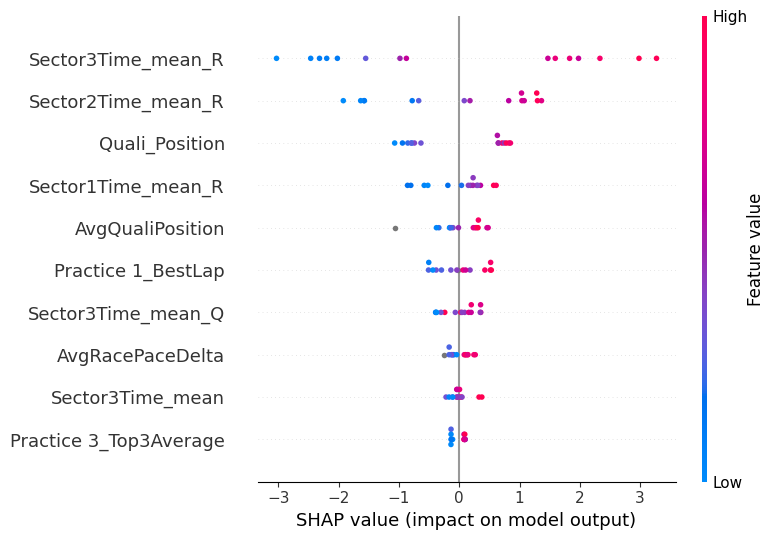

In [71]:
import shap
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)


In [72]:
import shap
shap.initjs()

i = 0 
shap.plots.force(shap_values[i])

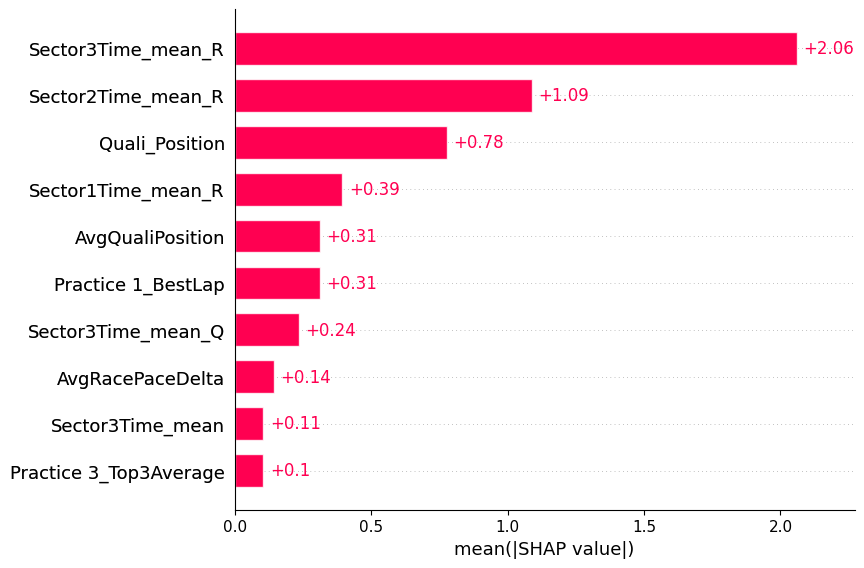

In [73]:
shap.plots.bar(shap_values)